<a href="https://colab.research.google.com/github/RamirexX89/Taller-1-/blob/main/TALLER_3_FINANZAS_COMPUTACIONALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TALLER 3

FINANZAS COMPUTACIONALES

*JUAN ANDRÉS ROZO QUEVEDO*

*JEFFREY STEVE RAMIREZ MARIN*


https://github.com/Jeffreeeeey/taller-3.git

In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual
y con cierre a Dic-2022:


a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un
DataFrame donde se resuman los caculos de: retornos esperados (promedio),
volatilidades, betas, retornos estimados (CAPM) y el coeficiente de determinación de cada
uno.

DISNEY (DIS)

VERIZON (VZ)

APPLE (AAPL)

INTEL (INTC)

COCA COLA (KO)

In [2]:
# Escoger un activo y un índice de mercado
precios = yf.download(['DIS','VZ','AAPL','INTC','KO'], start= "2017-01-01", end="2022-12-31", interval= "1Mo")["Adj Close"] #El beta se estima a 5 años con periodicidad mensual 
retornos = np.log(precios/precios.shift()).dropna()
p_indice= yf.download("^DJI", start= "2017-01-01", end="2022-12-31", interval= "1Mo")["Adj Close"] #El beta se estima a 5 años con periodicidad mensual 
r_indice = np.log(p_indice/p_indice.shift()).dropna()



[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
def ewma_vol(retornos,Lambda):
  k = len(retornos)                     
  e = np.arange(k-1,-1,-1)             
  alpha = Lambda**e                    
  s_var = (retornos**2)*alpha           
  var = s_var.sum()*(1-Lambda)          
  vol = np.sqrt(var)                   
  return(vol)

In [4]:
vol_ewmaAAPL = ewma_vol(retornos['AAPL'],Lambda=0.94)
EWMAAAPL= vol_ewmaAAPL*np.sqrt(252)
vol_ewmaVZ = ewma_vol(retornos['VZ'],Lambda=0.94)
EWMAVZ= vol_ewmaVZ*np.sqrt(252)
vol_ewmaDIS = ewma_vol(retornos['DIS'],Lambda=0.94)
EWMADIS= vol_ewmaDIS*np.sqrt(252)
vol_ewmaINTC = ewma_vol(retornos['INTC'],Lambda=0.94)
EWMAINTC= vol_ewmaINTC*np.sqrt(252)
vol_ewmaKO = ewma_vol(retornos['KO'],Lambda=0.94)
EWMAKO= vol_ewmaKO*np.sqrt(252)

In [5]:

X = r_indice
Y = retornos['AAPL']
X = sm.add_constant(X)
AAPLmodel = sm.OLS(Y, X).fit()
BETA_AAPL=AAPLmodel.params


In [6]:

X = r_indice
Y = retornos['VZ']
X = sm.add_constant(X)
VZmodel = sm.OLS(Y, X).fit()
BETA_VZ=AAPLmodel.params


In [7]:

X = r_indice
Y = retornos['INTC']
X = sm.add_constant(X)
INTCmodel = sm.OLS(Y, X).fit()
BETA_INTC=INTCmodel.params


In [8]:

X = r_indice
Y = retornos['KO']
X = sm.add_constant(X)
KOmodel = sm.OLS(Y, X).fit()
BETA_KO=KOmodel.params


In [10]:

X = r_indice
Y = retornos['DIS']
X = sm.add_constant(X)
DISmodel = sm.OLS(Y, X).fit()
BETA_DIS=DISmodel.params


In [11]:
##Retornos estimados
rf = 0
CAPM_AAPL = retornos['AAPL'].mean() + BETA_AAPL[1] * (r_indice.mean() - rf)
CAPM_VZ = retornos['VZ'].mean()+ BETA_VZ[1]  * (r_indice.mean() - rf)
CAPM_INTC = retornos['INTC'].mean() + BETA_INTC[1]  * (r_indice.mean() - rf)
CAPM_KO = retornos['KO'].mean() + BETA_KO[1]  * (r_indice.mean() - rf)
CAPM_DIS = retornos['DIS'].mean() + BETA_DIS[1]  * (r_indice.mean() - rf)



In [13]:
df = pd.DataFrame({'RETORNOS PROMEDIO': [retornos['AAPL'].mean(), retornos['VZ'].mean(), retornos['DIS'].mean(),retornos['INTC'].mean(),retornos['KO'].mean()], 'VARIACIONES':[EWMAAAPL,EWMAVZ, EWMADIS,EWMAINTC,EWMAKO], 'BETA':[ AAPLmodel.params['Adj Close'], VZmodel.params['Adj Close'],DISmodel.params['Adj Close'],INTCmodel.params['Adj Close'],KOmodel.params['Adj Close']], 'RETORNOS ESTIMADOS CAPM':[CAPM_AAPL,CAPM_VZ,CAPM_INTC,CAPM_KO,CAPM_DIS], 'COEFICIENTE DE CORRELACIÓN':[AAPLmodel.rsquared_adj,VZmodel.rsquared_adj,DISmodel.rsquared_adj,INTCmodel.rsquared_adj,KOmodel.rsquared_adj]}, index=["AAPL","VZ","DIS","INTC","KO"])
df

,RETORNOS PROMEDIO,VARIACIONES,BETA,RETORNOS ESTIMADOS CAPM,COEFICIENTE DE CORRELACIÓN
AAPL,0.021421,1.456872,1.074223,0.029168,0.365382
VZ,0.000809,0.874366,0.395168,0.008556,0.151273
DIS,-0.002796,1.661585,1.218145,0.003848,0.484911
INTC,-0.002325,1.493998,0.855942,0.013586,0.270048
KO,0.008697,0.909691,0.677887,0.005989,0.399918


b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del
CAPM y las betas de los activos.

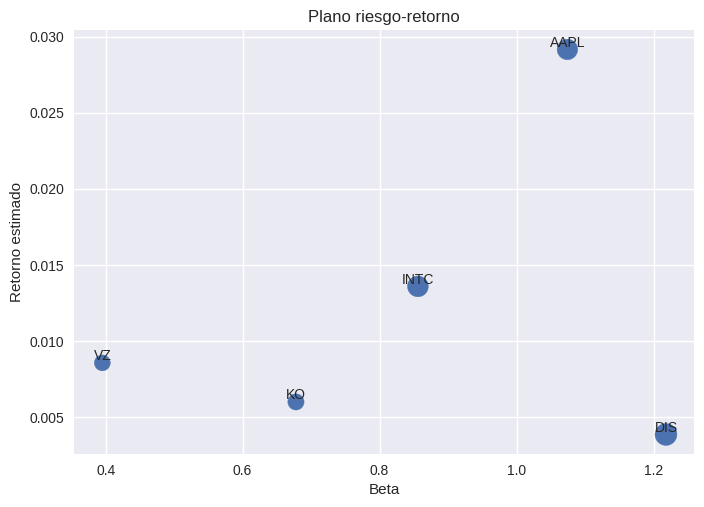

In [14]:
plt.style.use('seaborn')
plt.scatter(df['BETA'], df['RETORNOS ESTIMADOS CAPM'], df['VARIACIONES']*150, alpha= 1)

for i, txt in enumerate(df.index):
    plt.annotate(txt, (df['BETA'][i], df['RETORNOS ESTIMADOS CAPM'][i]), textcoords="offset points", xytext=(0,2), ha='center')

plt.xlabel('Beta')
plt.ylabel('Retorno estimado')
plt.title('Plano riesgo-retorno')

plt.show()

2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).


a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:
tomar solo posiciones largas en el portafolio.

In [15]:
activos = ['AAPL','HD','KO','V','VZ']
precios = yf.download(activos, start ="2017-01-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()
cov = retornos.cov()
sigma = retornos.std()

[*********************100%***********************]  5 of 5 completed


In [16]:
n = len(mu)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ mu == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/x.value.sum()
wpt


array([3.76367271e-01, 2.61705423e-01, 2.00504612e-01, 1.61422693e-01,
       1.21280895e-21])

In [17]:
# Retornos históricos del portafolio tangente:
ret_port = retornos @ wpt
rpt = ret_port.mean()
sigmapt = ret_port.std()
rpt*12, sigmapt*np.sqrt(12) #anualizados

(0.18688058716846517, 0.19278008525709622)

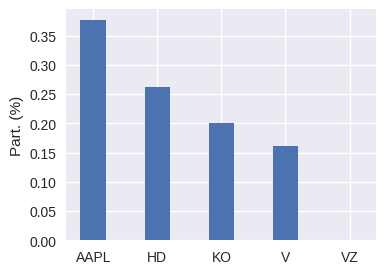

In [18]:
# Pesos del portafolio tangente de Sharpe
plt.figure(figsize = (4, 3))
plt.bar(activos, x.value/x.value.sum(), width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo estándar o paramétrico.

In [19]:
alpha = 0.05
VaR1= norm.ppf(alpha, mu ,sigma) 
VaR1

array([-0.12278477, -0.09727791, -0.07842938, -0.09066144, -0.07949584])

In [20]:
alpha = 0.01
VaR= norm.ppf(alpha, mu ,sigma) 
VaR

array([-0.18253209, -0.14325371, -0.11452762, -0.1338317 , -0.11276776])

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el
modelo de estimación histórica.

In [21]:
var_historico95 = retornos.quantile(0.05)
var_historico99 = retornos.quantile(0.01)
var_historico95, var_historico99

(AAPL   -0.125879
 HD     -0.108831
 KO     -0.092070
 V      -0.093111
 VZ     -0.090637
 Name: 0.05, dtype: float64,
 AAPL   -0.156552
 HD     -0.157035
 KO     -0.147961
 V      -0.120519
 VZ     -0.101393
 Name: 0.01, dtype: float64)

d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000
portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

In [22]:
port_rand = 10000
weights = np.zeros((port_rand, n))
# Simulate portfolio weights
for i in range(port_rand):
    w = np.random.random(n)
    w = w / np.sum(w)            # Normalize weights so they sum to 1
    weights[i,:] = w             # Matrix of random portafolios
weights[45,:].sum()


1.0

In [23]:
t = len(retornos.iloc[:,1])
rand_returns = np.zeros((t,port_rand))
for i in range(port_rand):
  rand_returns[:,i] = retornos @ weights[i,:]

In [24]:
alpha = 0.05
VaR2= norm.ppf(alpha, rand_returns.mean() ,rand_returns.std()) 
VaR2

-0.06648814404642561

e. ¿Se encuentran diferencias significativas entre el VaR de simulación y el VaR de
paramétrico?

In [25]:
VaR1.mean(),VaR2

(-0.09372987023955459, -0.06648814404642561)

Si se encuentran diferencias significativas 

Los precios de activos riesgos en el mercado describen un proceso estocástico {St
}
t≥0

que satisface:

St = S0 exp{(μ– 1/2σ
2
)dt + σ dWt
}

Donde: μ es la tasa de retorno del activo, σ es su volatilidad y Wt es un proceso estándar de
Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de
tiempo t.

3. a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente
gráficamente las primeras 20 trayectorias del proceso.

In [26]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [ ]:
activos = ['HD']
precios = yf.download(activos, start='2021-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
#10.000 posibles vaores de accion
T = 1 # Un Año
mu = retornos.mean()*12
sigma  = retornos.std()*np.sqrt(12)
S0  = 313
NS = 10000
M = 12 # Partición del año en días
St = PathsGBM(S0,mu,sigma,T,NS,M)

In [ ]:
#20 primeras trayectorias del proceso
T = 1 # Un Año
mu = retornos.mean()*12
sigma  = retornos.std()*np.sqrt(12)
S0  = 313
NS1 = 20
M = 12 # Partición del año en días
St2 = PathsGBM(S0,mu,sigma,T,NS1,M)

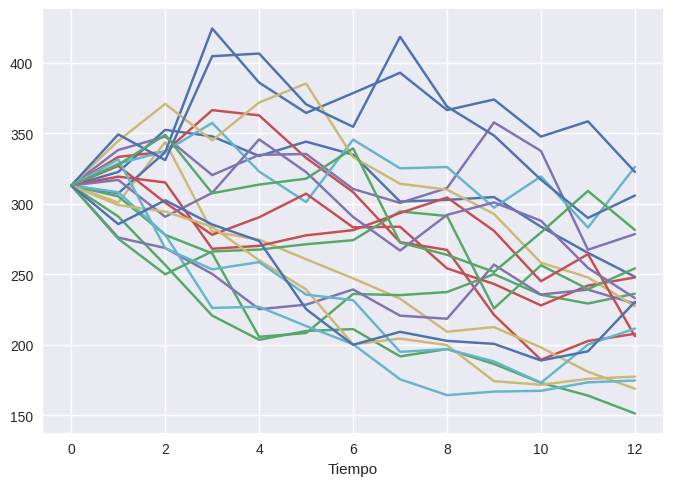

In [ ]:
plt.plot(np.transpose(St2)) 
plt.xlabel("Tiempo");

b. Construya el histograma de los precios y retornos al final del periodo (t = 1). ¿qué puede
concluir de la forma de los histogramas?

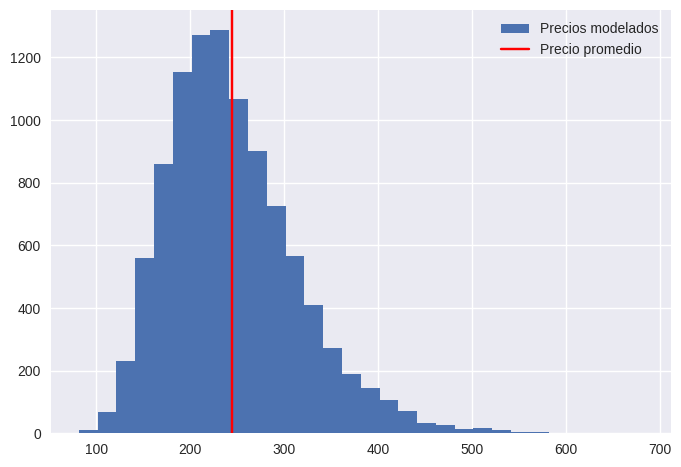

In [ ]:
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

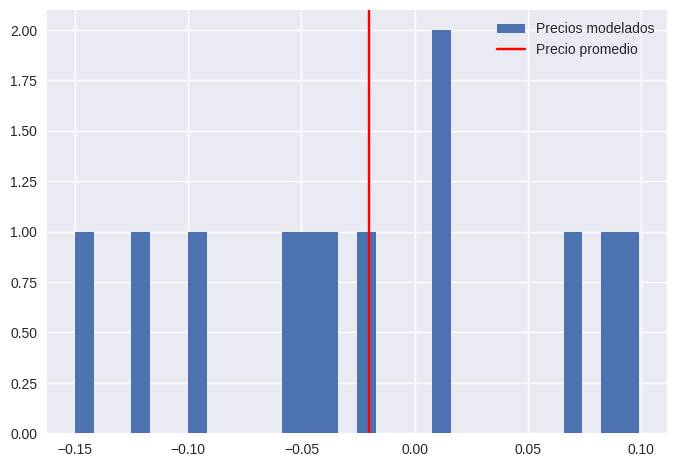

In [ ]:
plt.hist(retornos, bins=30, label='Precios modelados')
plt.axvline(retornos.mean(), color='r', label='Precio promedio')
plt.legend();

Vemos que en el histograma de los precios la distribuión no es simétrica, 
mientras que en los retornos se mantiene constante aunque se aprecia un pequeño aumento en los retornos

c. Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

In [ ]:
St[:,-1].mean()

244.66332973137474

In [ ]:
S0 * np.exp(mu * T) 

245.22452670449212

El valor del precio en T si converge a ST exp{μ T}.

d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [ ]:
mu, std= norm.fit(precios)
probabilidad= norm.cdf(313, loc=mu, scale=std)
probabilidad

0.5765882220851865

4. Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan
ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de
estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso Xt que satisface:

Xt+dt = Xt + (μ–Xt)dt + σ(Wt+dt − Wt)

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles
trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ =
0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras
10 trayectorias del proceso.

In [ ]:
def PathsGBM(X0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    X = np.zeros([NS, M+1])
    X[:,0] = X0
    dt = T / M
    k=1
    std_dt = np.sqrt(sigma**2/(2*k)*(1-np.exp(-2*k*dt)))
    for t in range(0,M):
        X[:,t+1] =mu + np.exp(-k*dt) * (X[:,t]-mu) + std_dt *Z[:,t]
    return X

In [ ]:
#Función de 100 Posibles trayectorias
T=5
mu =5*12
sigma =0.3*np.sqrt(12) 
X0 =1
NS = 100
M = 60 
k=1
Xt = PathsGBM(X0,mu,sigma,T,NS,M)
Xt

array([[ 1.        ,  5.53177094,  9.28846594, ..., 59.23268585,
        58.47821787, 58.59629738],
       [ 1.        ,  5.69626047,  9.90891829, ..., 59.20121098,
        59.04877899, 59.19609992],
       [ 1.        ,  5.24016583,  9.66393721, ..., 58.68460465,
        58.39446396, 58.12193395],
       ...,
       [ 1.        ,  5.56148698,  9.75784614, ..., 59.35265513,
        59.52175116, 59.96639986],
       [ 1.        ,  5.93487618, 10.36535307, ..., 59.13733755,
        58.66132023, 58.95918888],
       [ 1.        ,  5.64918044,  9.72779851, ..., 57.32885425,
        57.43484337, 56.97596633]])

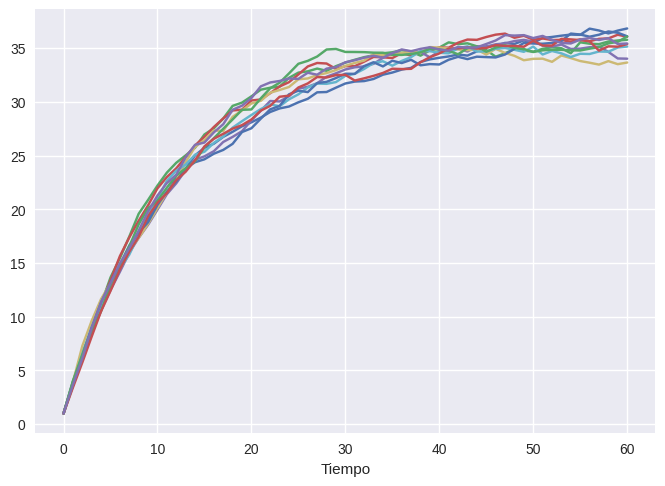

In [ ]:
#10 primeras trayectorias del proceso
T=5
mu =3*12
sigma =0.3*np.sqrt(12) 
X0 =1
NS = 10
M = 60 
k=1
Xt = PathsGBM(X0,mu,sigma,T,NS,M)
plt.plot(np.transpose(Xt))
plt.xlabel("Tiempo");

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede
concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo
plazo?

In [ ]:
mean=mu+np.exp(-k*T)*(X0-mu)
std= np.sqrt(sigma**2/(2*k)*(1-np.exp(-2*k*T)))
mean, std

(35.76417185503201, 0.7348302416462785)

A largo plazo estas trayectorias se mantendran constantes hasta posiblemente llegar a un punto donde empiezen a decaer.

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso
Ornstein-Uhlenbeck?

**Es una distribución normal con media μ y varianza sigma^2/2(k)**

d. Teniendo en cuenta los siguientes parámetros: r0 = 0. 03, μ = 0. 05, σ = 0. 15, T =
1, NS = 100, dt = T/m; simule 100 posibles valores de la tasa de corta en el instante
T = 1, y utilice el valor promedio obtenido para valorar un bono cero cupón y facial 100 con
vencimiento en T. Presente gráficamente los resultados para las primeras 10 trayectorias del
proceso.

In [ ]:
r0=0.03
mu=0.05
sigma=0.15
T=1
NS=100
M=60
dt= T / M

r=np.zeros((NS,M+1))
r[:,0]=r0
for a in range(NS):
  for b in range(M):
    r[a,b+1]= r[a,b]+(mu-r[a,b])*dt+sigma*np.random.normal()*np.sqrt(dt) 

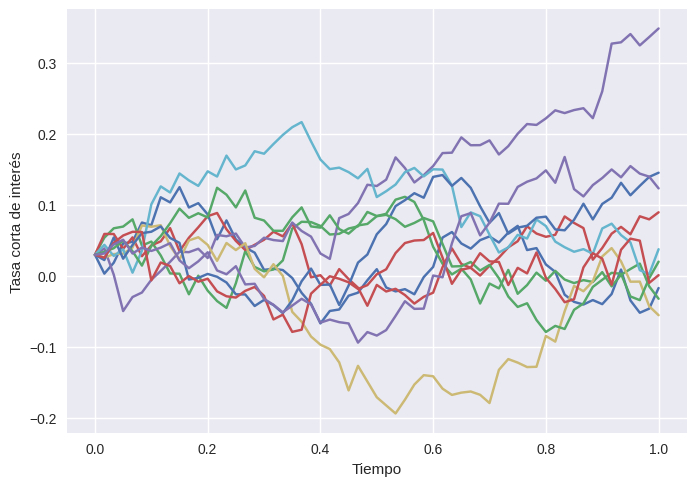

In [ ]:
for a in range(10):
  plt.plot(np.linspace(0,T,M+1), r[a,:], label=f"Trayectoria{a+1}")
plt.xlabel("Tiempo")
plt.ylabel("Tasa corta de interés")
plt.show()

In [ ]:
precio=np.exp(-r[:,-1]*T)*100
np.mean(precio)

97.2047259387272

El valor promedio obtenido del bono cero cupón es de 95.68 siendo menor al facial de 100

5. Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con
periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año
2023, para este ejercicio tenga en cuenta que las series pueden seguir un proceso
estocástico tipo MGB o de reversión a la media tipo OU.

a. La gráfica de las series históricas de los precios

b.Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

c. Los resultados de la simulación

**COOPER HG=f**

[*********************100%***********************]  1 of 1 completed
ADF test: -3.058196
P-value: 0.029806
Citical values:
	1%: -3.466598
	5%: -2.877467
	10%: -2.575260


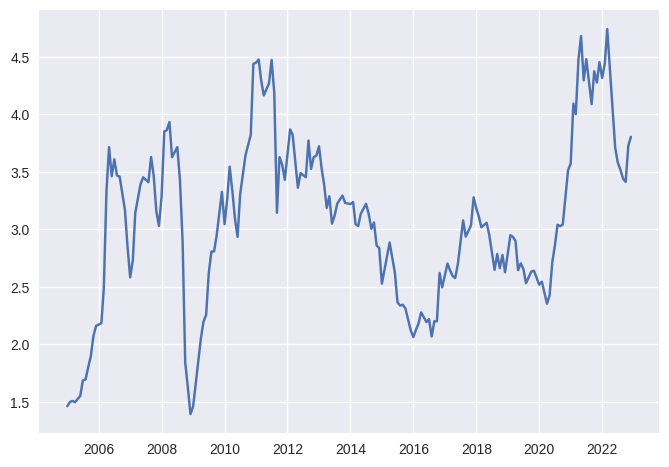

In [27]:
activos = ["HG=F"]
precios = yf.download(activos, start="2005-01-01", end="2022-12-31", interval="1Mo")["Adj Close"].dropna()
retornos = np.log(precios/precios.shift()).dropna()
plt.plot(precios) 
pruebadf1 = adfuller(precios) 
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

SERIE ESTACIONARIA AL 5% DE SIGNIFICANCIA (USAMOS OU)

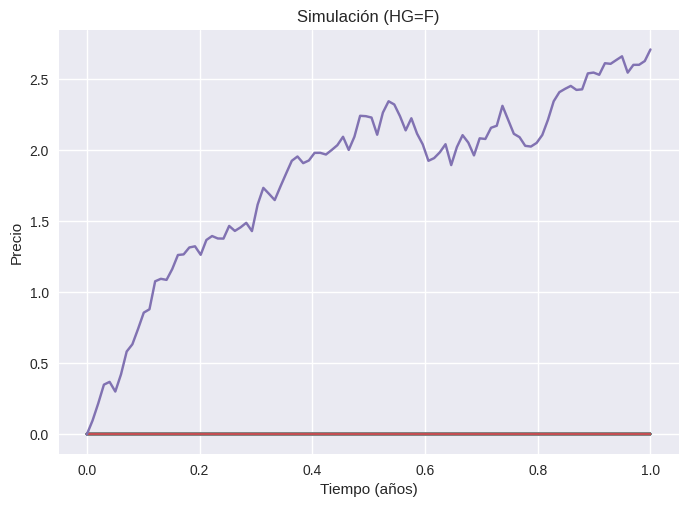

In [31]:

t0 = 0 
T = 1 # Año
steps = 100
k = 1
mu = precios.mean()
sigma = precios.std()

simulacion = np.zeros((steps,100))
for j in range(100):
 t = np.linspace(t0,T,steps) # time axis
 dt = np.mean(np.diff(t))
 y = np.zeros(steps)
 y0 = np.random.normal(0,1) 
 drift = lambda y,t: k*(mu-y) 
 diffusion = lambda y,t: sigma 
 noise = np.random.normal(0,1,steps)*np.sqrt(dt) 

for i in range(1,steps):
 y[i] = y[i-1] + drift(y[i-1],i*dt)*dt + diffusion(y[i-1],i*dt)*noise[i] 
simulacion[:,j] = y 

plt.plot(t, simulacion);
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio')
plt.title('Simulación (HG=F)')
plt.show()


In [32]:
y.mean(), y.std()

(1.8114105108732568, 0.6457352335296088)

**GBPUSD CURRENCY (GBPUSD=X)**

[*********************100%***********************]  1 of 1 completed
ADF test: -1.631676
P-value: 0.466614
Citical values:
	1%: -3.461429
	5%: -2.875207
	10%: -2.574054


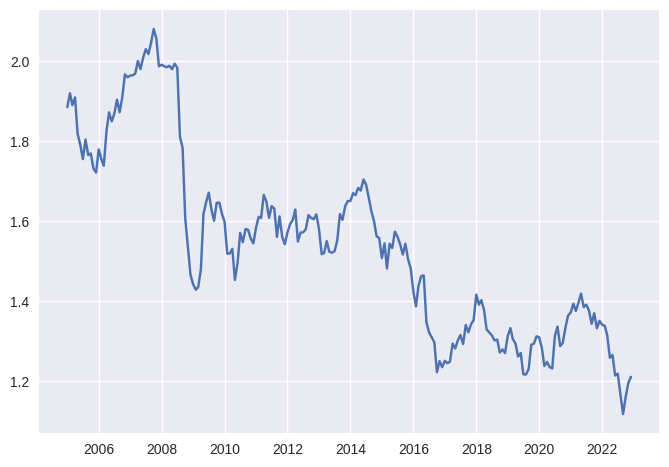

In [33]:

activos = ['GBPUSD=X']
precios = yf.download(activos, "2005-01-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()
plt.plot(precios) 
pruebadf1 = adfuller(precios)  # Options: regression='c', 'ct', 'n', autolag='AIC'
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

SERIE NO ESTACIONARIA AL 5% (USAMOS BROWNIANO GEOMETRICO)

In [34]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M  #T es año, el vencimiento y M el número de trayectorias 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

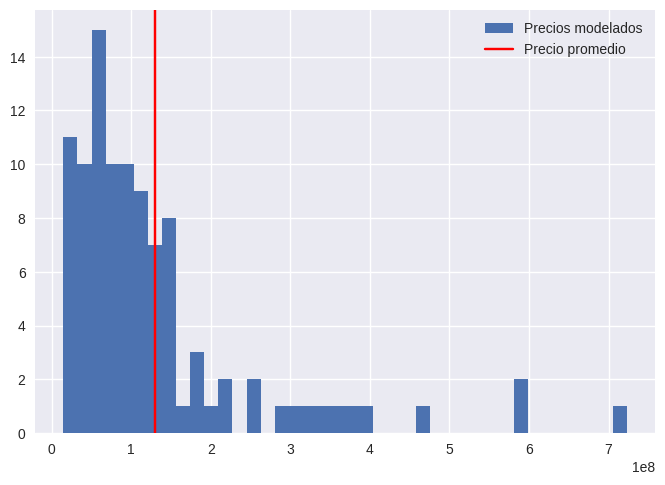

In [35]:
T= 1 
mu = precios.mean()*12
sigma = precios.std()*np.sqrt(12) #Anualizado *np.sqrt(12) SIEMPRE ANUALIZAR 
S0 = precios[-1]
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M) 
plt.hist(St[:,-1], bins=40, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

In [36]:
St[:,-1].mean(), St[:,-1].std()

(129784294.89124177, 126731352.16699046)

**COFFEE FUTURES (KC=F)**

[*********************100%***********************]  1 of 1 completed
ADF test: -3.329256
P-value: 0.013620
Citical values:
	1%: -3.467420
	5%: -2.877826
	10%: -2.575452


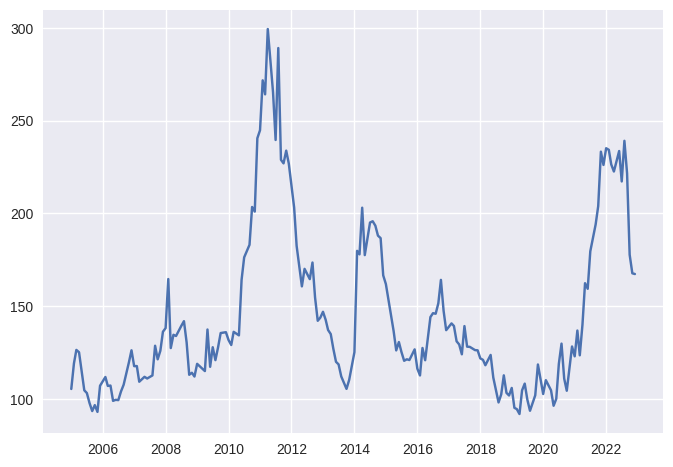

In [41]:
activos = ['KC=F']
precios = yf.download(activos, "2005-01-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()
plt.plot(precios) 
pruebadf1 = adfuller(precios)  # Options: regression='c', 'ct', 'n', autolag='AIC'
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

In [42]:
y.mean(), y.std()

(1.8114105108732568, 0.6457352335296088)

SERIE ESTACIONARIA AL 5% (USAMOS OU)

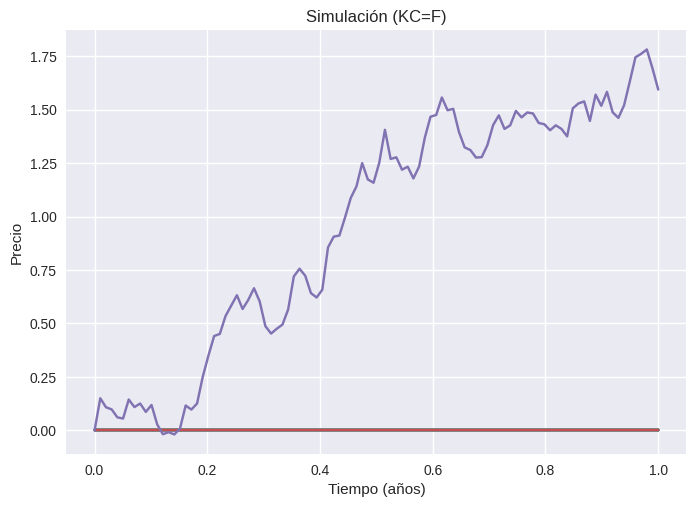

In [ ]:
t0 = 0 
T = 1 # Año
steps = 100
k = 1
mu = precios.mean()
sigma = precios.std()

plt.plot(t, simulacion);
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio')
plt.title('Simulación (KC=F)')
plt.show()

In [ ]:
y.mean(), y.std()

(0.9550040453333466, 0.564835370461061)

**NATURAL GAS (NG=F)**

[*********************100%***********************]  1 of 1 completed
ADF test: -3.157328
P-value: 0.022591
Citical values:
	1%: -3.468280
	5%: -2.878202
	10%: -2.575653


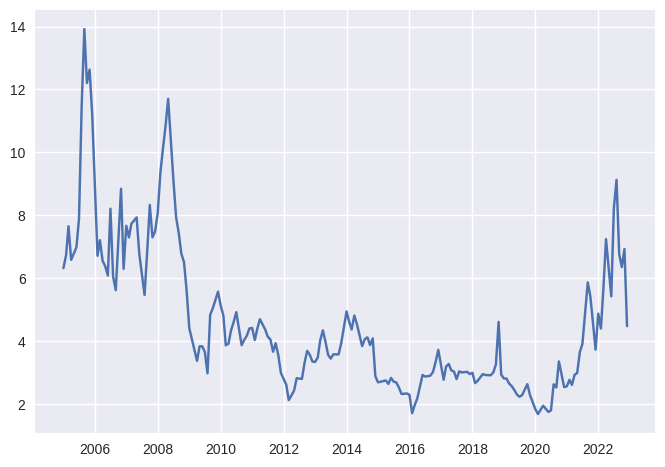

In [ ]:
activos = ['NG=F']
precios = yf.download(activos, "2005-01-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()
plt.plot(precios) 
pruebadf1 = adfuller(precios)  # Options: regression='c', 'ct', 'n', autolag='AIC'
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

SERIE ESTACIONARIA AL 5% (USAMOS OU)




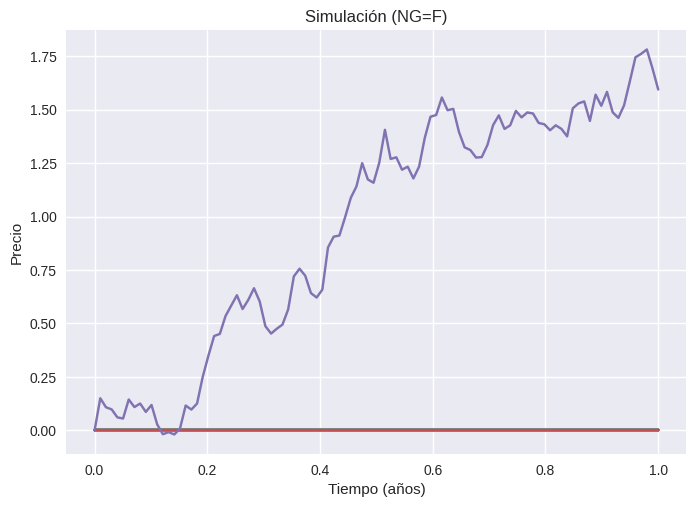

In [ ]:
t0 = 0 
T = 1 # Año
steps = 100
k = 1
mu = precios.mean()
sigma = precios.std()

plt.plot(t, simulacion);
plt.xlabel('Tiempo (años)')
plt.ylabel('Precio')
plt.title('Simulación (NG=F)')
plt.show()

In [ ]:
y.mean(), y.std()

(0.9550040453333466, 0.564835370461061)